<a href="https://colab.research.google.com/github/shashankkotia/DREAM-CAKE/blob/main/Hill_and_Valley_Prediction_using_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Hill and Valley Prediction using Logistics Regression

**Getting understanding about Data Set**
Each record represents 100 points on a two-dimensional graph.When plotted in order as the y coordinate,the points will create either a Hill or a valley .see the original source for some example of these graphs.
1-100:Labled "V##",Floating point values (numeric),the x=values.
101:labled "Class".Binary(0,1) representing{valley,hill}





Import Library

In [2]:
import pandas as pd


Import Data

In [5]:
pf = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Hill%20Valley%20Dataset.csv')

Describe Data

In [6]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [7]:
pf.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


Data Visualization

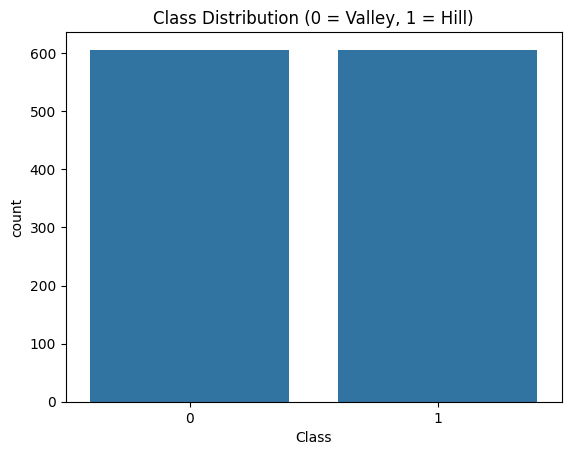

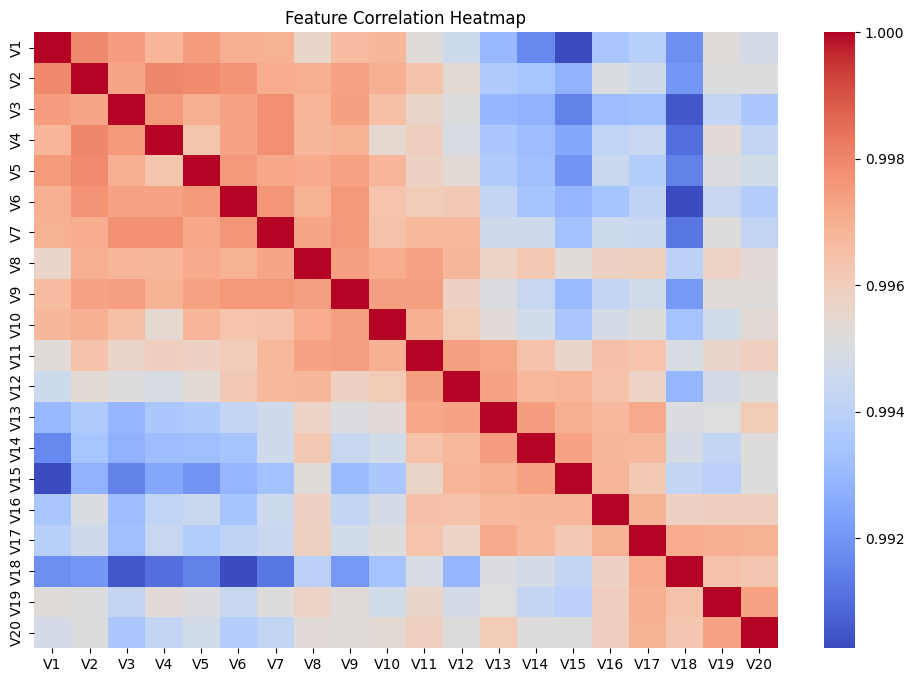

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
pf.head()


sns.countplot(x='Class', data=pf)
plt.title('Class Distribution (0 = Valley, 1 = Hill)')
plt.show()


corr = pf.iloc[:, :20].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Data Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = pf.drop('Class', axis=1)
y = pf['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Define Target Variable (y) and Feature Variables (X)

In [15]:
X = pf.drop('Class', axis=1)

In [16]:
X = pf.drop('Class', axis=1)

In [17]:
X.shape

(1212, 100)

In [18]:
y.shape

(1212,)

Train Test Split

In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


X_train.shape
y_train.shape
X_test.shape
y_test.shape


(364,)

Modeling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model = LogisticRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy
conf_matrix
class_report


'              precision    recall  f1-score   support\n\n           0       0.59      0.98      0.74       176\n           1       0.96      0.36      0.53       188\n\n    accuracy                           0.66       364\n   macro avg       0.77      0.67      0.63       364\nweighted avg       0.78      0.66      0.63       364\n'

Model Evaluation

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy
conf_matrix
class_report


'              precision    recall  f1-score   support\n\n           0       0.59      0.98      0.74       176\n           1       0.96      0.36      0.53       188\n\n    accuracy                           0.66       364\n   macro avg       0.77      0.67      0.63       364\nweighted avg       0.78      0.66      0.63       364\n'

Prediction

In [23]:

y_pred = model.predict(X_test)

y_pred[:10]



array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0])